## Stakeholder: Real Estate Agency seeking a model to determine price of homes.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Disabling pretty printing
%pprint

Pretty printing has been turned OFF


In [3]:
#Loading in original dataset
df_original = pd.read_csv("data/kc_house_data.csv")

### Viewing the data

In [4]:
#Checking the data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking NA values
df_original.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the data
df_original.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Cleaning the data

In [7]:
#Making a copy to preserve original dataframe for point of reference
from copy import deepcopy
df = deepcopy(df_original)

In [8]:
#Sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Dropping NAN values from view so we can encode the ordinal values 
df.dropna(subset=['view'], inplace = True)

### Some data is catagorical, converting using OrdinalEncoder

In [10]:
# Selecting columns to convert
ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

,condition,grade,view
0,Average,7 Average,NONE
1,Average,7 Average,NONE
2,Average,6 Low Average,NONE
3,Very Good,7 Average,NONE
4,Average,8 Good,NONE
...,...,...,...
21592,Average,8 Good,NONE
21593,Average,8 Good,NONE
21594,Average,7 Average,NONE
21595,Average,8 Good,NONE


In [11]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Ordering the items
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [13]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [14]:
#create dataframe of ordinal data
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,grade,view
0,2.0,4.0,0.0
1,2.0,4.0,0.0
2,2.0,3.0,0.0
3,4.0,4.0,0.0
4,2.0,5.0,0.0
...,...,...,...
21529,2.0,5.0,0.0
21530,2.0,5.0,0.0
21531,2.0,4.0,0.0
21532,2.0,5.0,0.0


In [15]:
#input ordinal data into df
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [16]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [17]:
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       26
10.0      13
0.0        1
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [18]:
df['grade_num'] = np.where(df['grade_num'] == 0.0, 1.0, df['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [19]:
#Sanity check
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       27
10.0      13
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [20]:
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['view'].value_counts())

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64
7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num           62
grade_num          62
view_num           62
dtype: int64

In [23]:
#after too much time, we couldnt discover to source of 62 NAN's appearing. so we drop them
df.dropna(subset=['view_num', 'cond_num', 'grade_num'], inplace = True)

In [24]:
#sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2359
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3818
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [25]:
#The basement datatype should be numeric, however it was an object containing "?"" values. 
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
#sanity check
df['sqft_basement'].isna().sum()

451

In [26]:
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21021 non-null  int64  
 1   date           21021 non-null  object 
 2   price          21021 non-null  float64
 3   bedrooms       21021 non-null  int64  
 4   bathrooms      21021 non-null  float64
 5   sqft_living    21021 non-null  int64  
 6   sqft_lot       21021 non-null  int64  
 7   floors         21021 non-null  float64
 8   waterfront     18699 non-null  object 
 9   view           21021 non-null  object 
 10  condition      21021 non-null  object 
 11  grade          21021 non-null  object 
 12  sqft_above     21021 non-null  int64  
 13  sqft_basement  21021 non-null  float64
 14  yr_built       21021 non-null  int64  
 15  yr_renovated   17290 non-null  float64
 16  zipcode        21021 non-null  int64  
 17  lat            21021 non-null  float64
 18  long  

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21021 non-null  int64         
 1   date           21021 non-null  datetime64[ns]
 2   price          21021 non-null  float64       
 3   bedrooms       21021 non-null  int64         
 4   bathrooms      21021 non-null  float64       
 5   sqft_living    21021 non-null  int64         
 6   sqft_lot       21021 non-null  int64         
 7   floors         21021 non-null  float64       
 8   waterfront     18699 non-null  object        
 9   view           21021 non-null  object        
 10  condition      21021 non-null  object        
 11  grade          21021 non-null  object        
 12  sqft_above     21021 non-null  int64         
 13  sqft_basement  21021 non-null  float64       
 14  yr_built       21021 non-null  int64         
 15  yr_renovated   1729

<AxesSubplot:>

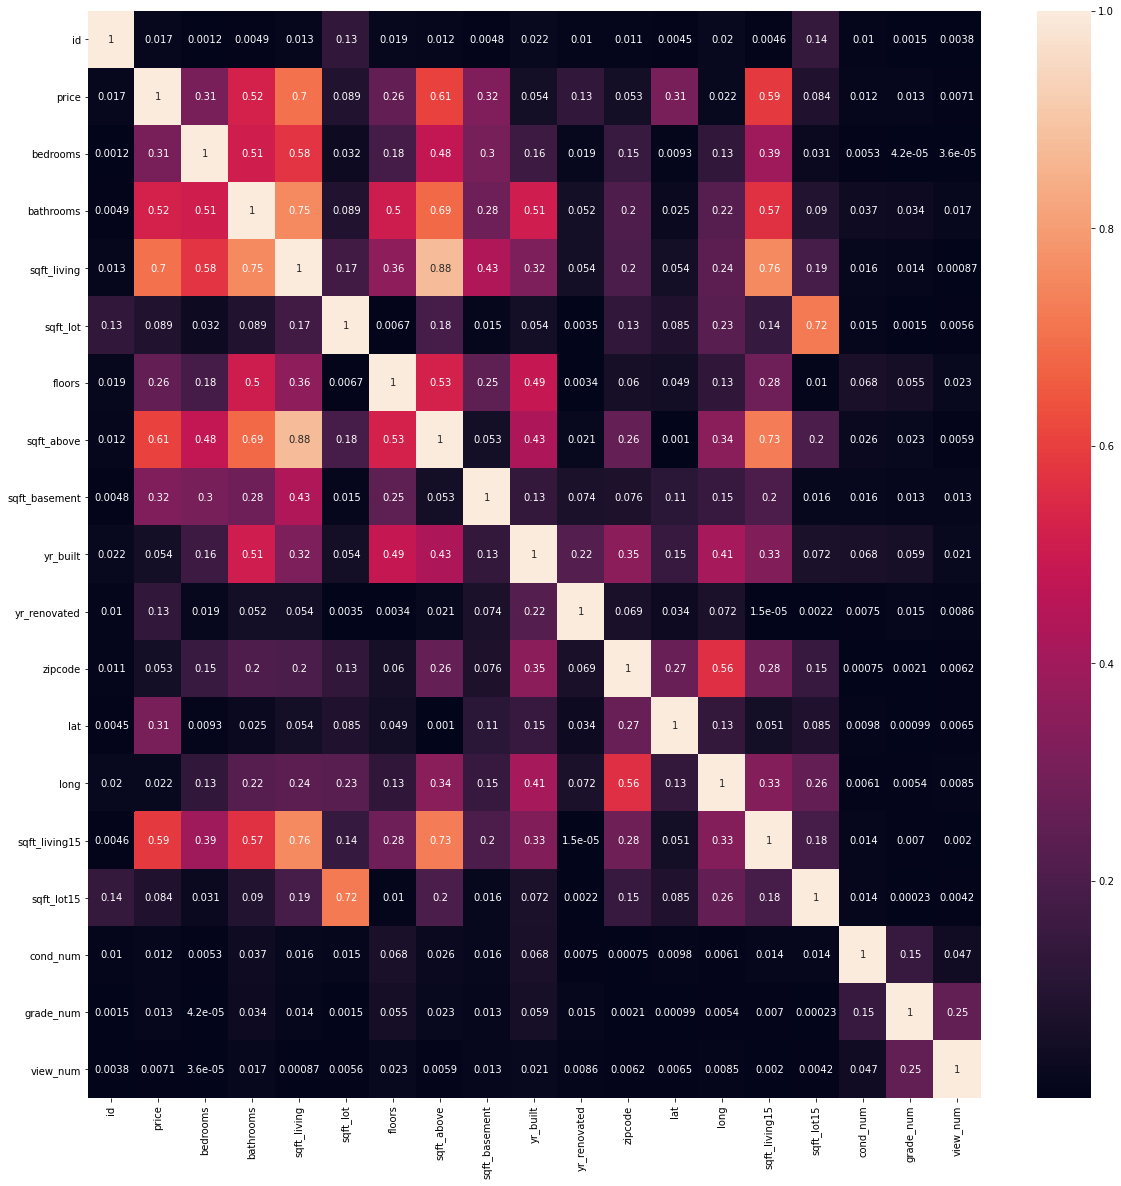

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().abs(), annot = True)

<Figure size 1440x1440 with 0 Axes>

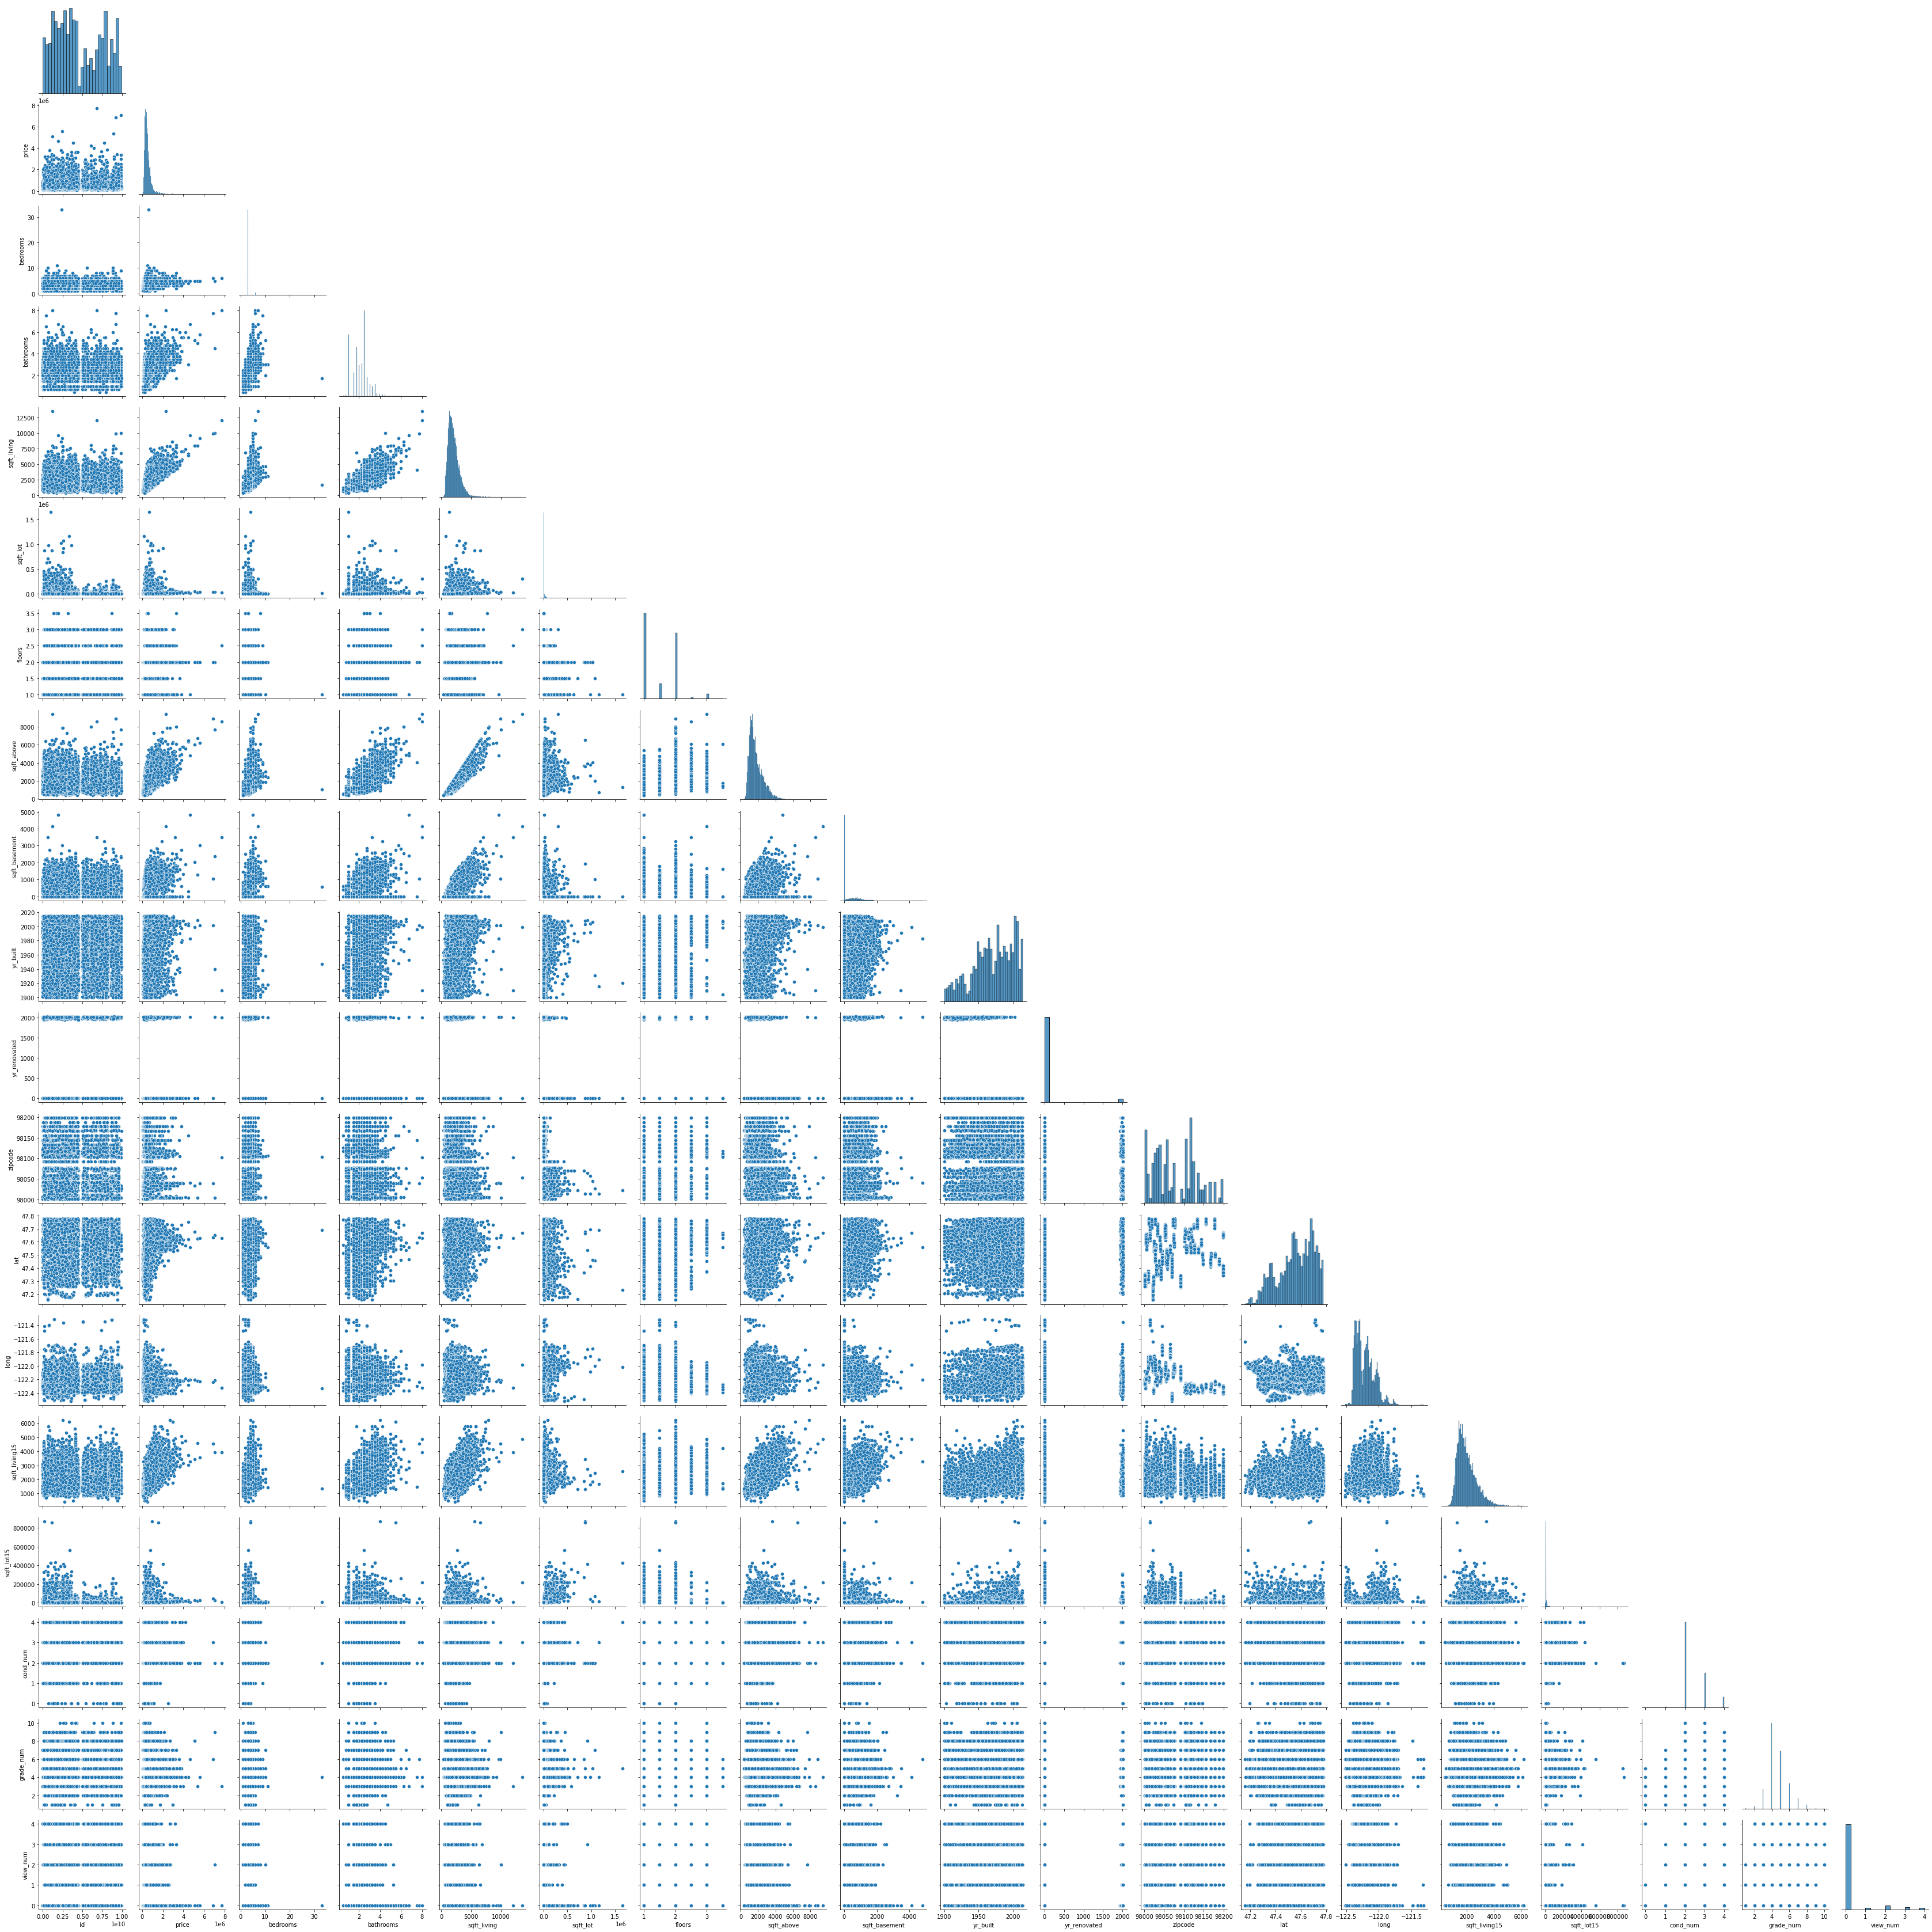

In [31]:
plt.figure(figsize = (20,20))
sns.pairplot(df, corner = True)

### Prelim Findings from heatmap/correlations

Price has the highest corr with sqft living, followed by bathrooms, sqft living15, bedrooms, floors, lat

Stronng co-linearity with sqft living, sqft above, and sqft basement as sqft living = sqft above + basement. Thus above and basement are somewhat redundant. we will revist after additional columns have been removed/added and data is thoroughly cleaned

Sqft living has the highest corr with bathrooms, price, bedrooms, sqft above, basement, floor

In [32]:
# columns to make, bed/bath, sqft_avg_above/floor, binary basement or no, binary renovated or no, waterfront or no, city or town binary

In [33]:
df = df.drop(columns = ['id', 'date', 'lat', 'long', 'view', 'grade', 'condition'])
#dropping these columns, ID and Date tell us nothing. 
#lat and long are columns we do not plan to use. for neighborhood data we will use zipcode. 
#and view/grade/ condition are now redundent

In [34]:
#sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2

In [35]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2322
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3731
zipcode             0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [36]:
df['bed/bath'] = df['bedrooms'] / df['bathrooms']
df['avg_fl_space'] = df['sqft_above'] / df['floors']

In [37]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
 17  bed/bath       21021 non-null  float64
 18  avg_fl

In [38]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1948.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:14   Log-Likelihood:            -2.8997e+05
No. Observations:               21021   AIC:                         5.800e+05
Df Residuals:                   21005   BIC:                         5.801e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.84e+06   3.41e+06     -2.301      0.021   -1.45e+07   -1.16e+06
bedrooms      -1.356e+05   3903.452    -34.728      0.000   -1.43e+05   -1.28e+05
bathrooms      1.914e+05   6848.044     27.943      0.000    1.78e+05    2.05e+05
sqft_living     141.7977      3.236     43.815      0.000     135.454     148.141
sqft_lot         -0.0237      0.057     -0.414      0.679      -0.136       0.089
floors         1.249e+05   8391.467     14.881      0.000    1.08e+05    1.41e+05
sqft_above       35.9587      4.530      7.938      0.000      27.080      44.838
sqft_basement   105.8389      3.518     30.085      0.000      98.943     112.734
yr_built      -3479.0973     75.148    -46.297      0.000   -3626.393   -3331.802
zipcode         144.1686     34.296      4.204      0.000      76.946     211.391
sqft_living15   105.0662      3.837     27.382      0.000      97.545     112.587
sqft_lot15       -0.6713      0.088     -7.666      0.000      -0.843      -0.500
cond_num      -3260.6439   2556.368     -1.275      0.202   -8271.322    1750.034
grade_num      2623.8912   1464.916      1.791      0.073    -247.456    5495.238
view_num       1934.4735   2215.605      0.873      0.383   -2408.284    6277.231
bed/bath       1.366e+05   6205.943     22.011      0.000    1.24e+05    1.49e+05
avg_fl_space    104.8546     10.516      9.971      0.000      84.242     125.467
==============================================================================
Omnibus:                    14256.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594535.416
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      28.475   Cond. No.                     1.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
df.dropna(subset = ['waterfront'], inplace = True)
df['water_bool'] = df['waterfront'].str.replace("NO", "0")
df['water_bool'] = df['water_bool'].str.replace("YES", "1")
df['water_bool'] = df['water_bool'].astype(int)

In [40]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']
#repeating the model with waterfront as a boolean included.
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1838.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:14   Log-Likelihood:            -2.5749e+05
No. Observations:               18699   AIC:                         5.150e+05
Df Residuals:                   18682   BIC:                         5.152e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.69e+06   3.53e+06     -1.611      0.107   -1.26e+07    1.23e+06
bedrooms      -1.258e+05   4057.239    -30.999      0.000   -1.34e+05   -1.18e+05
bathrooms      1.818e+05   7098.808     25.612      0.000    1.68e+05    1.96e+05
sqft_living     140.7294      3.342     42.116      0.000     134.180     147.279
sqft_lot         -0.0167      0.060     -0.280      0.779      -0.134       0.100
floors         1.169e+05   8690.628     13.447      0.000    9.98e+04    1.34e+05
sqft_above       42.1512      4.685      8.997      0.000      32.969      51.334
sqft_basement    98.5867      3.642     27.067      0.000      91.448     105.726
yr_built      -3363.8361     77.854    -43.207      0.000   -3516.437   -3211.235
zipcode         120.2863     35.538      3.385      0.001      50.630     189.943
sqft_living15    95.9238      3.979     24.110      0.000      88.125     103.722
sqft_lot15       -0.7168      0.090     -7.984      0.000      -0.893      -0.541
cond_num      -3000.4250   2641.856     -1.136      0.256   -8178.703    2177.853
grade_num      1630.8383   1522.488      1.071      0.284   -1353.377    4615.054
view_num       2075.7012   2283.249      0.909      0.363   -2399.675    6551.077
bed/bath       1.281e+05   6445.794     19.867      0.000    1.15e+05    1.41e+05
avg_fl_space     97.3449     10.874      8.952      0.000      76.032     118.658
water_bool     7.223e+05   1.99e+04     36.290      0.000    6.83e+05    7.61e+05
==============================================================================
Omnibus:                    11714.467   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463328.268
Skew:                           2.432   Prob(JB):                         0.00
Kurtosis:                      26.896   Cond. No.                     2.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Viewing the P vales, we can conclude that sqft_lot as well as our derived ordinal columns have no substantial impact on our R2

In [41]:
#we dropped all the rows that have NaNs as we beleive we have enough datapoints to run ours models.
df = df.dropna()
df.isna().sum()
df.shape

(15390, 20)

In [45]:
#loading in zipcode data
zipcodes = pd.read_csv("zipcodes.csv")
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop(columns = ['Unnamed: 0', 'Timezone', 'Classification', "Area Code(s)"], inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)
zipcodes.head()

,zipcode,City,Population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714


In [46]:
#mergeing into main dataframe
df = df.merge(zipcodes, on='zipcode', how='left')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,bed/bath,avg_fl_space,water_bool,City,Population
0,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,...,1690,7639,2.0,4.0,0.0,1.333333,1085.0,0,Seattle,37081
1,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,...,1360,5000,4.0,4.0,0.0,1.333333,1050.0,0,Seattle,14770
2,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,...,1800,7503,2.0,5.0,0.0,1.500000,1680.0,0,Sammamish,25748
3,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,...,4760,101930,2.0,8.0,0.0,0.888889,3890.0,0,Redmond,18784
4,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,...,1780,8113,2.0,4.0,0.0,3.000000,1050.0,0,Seattle,25922


In [49]:
#creating dummies for the catagorical nominal data of cities. 
X_city = pd.get_dummies(df['City'], drop_first = True)

df_cities = pd.concat([df, X_city], axis = 1)
df_cities.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [51]:
#creating dummies for the catagorical nominal data of cities. 
X_zip = pd.get_dummies(df['zipcode'], drop_first = True)

df_zip = pd.concat([df, X_zip], axis = 1)
df_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,...,0,0,0,0,0,0,0,0,0,0
3,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,...,0,0,0,0,0,0,0,0,0,0
4,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15390 entries, 0 to 15389
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15390 non-null  float64
 1   bedrooms       15390 non-null  int64  
 2   bathrooms      15390 non-null  float64
 3   sqft_living    15390 non-null  int64  
 4   sqft_lot       15390 non-null  int64  
 5   floors         15390 non-null  float64
 6   waterfront     15390 non-null  object 
 7   sqft_above     15390 non-null  int64  
 8   sqft_basement  15390 non-null  float64
 9   yr_built       15390 non-null  int64  
 10  yr_renovated   15390 non-null  float64
 11  zipcode        15390 non-null  int64  
 12  sqft_living15  15390 non-null  int64  
 13  sqft_lot15     15390 non-null  int64  
 14  cond_num       15390 non-null  float64
 15  grade_num      15390 non-null  float64
 16  view_num       15390 non-null  float64
 17  bed/bath       15390 non-null  float64
 18  avg_fl

In [55]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_cities.drop(columns= not_included)
y = df_cities['price']
#repeating the model with cities as dummies
model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     994.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:33:54   Log-Likelihood:            -2.0941e+05
No. Observations:               15390   AIC:                         4.189e+05
Df Residuals:                   15349   BIC:                         4.192e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.022e+08   8.03e+06     25.178      0.000    1.86e+08    2.18e+08
bedrooms      -1.017e+05   3828.634    -26.566      0.000   -1.09e+05   -9.42e+04
bathrooms      1.462e+05   6682.219     21.878      0.000    1.33e+05    1.59e+05
sqft_living     145.3775      3.130     46.446      0.000     139.242     151.513
sqft_lot          0.1828      0.055      3.334      0.001       0.075       0.290
floors         7695.3523   8407.615      0.915      0.360   -8784.570    2.42e+04
sqft_above       99.2213      4.507     22.015      0.000      90.387     108.055
sqft_basement    46.1562      3.530     13.076      0.000      39.237      53.075
yr_built      -1647.6872     80.257    -20.530      0.000   -1805.000   -1490.374
zipcode       -2033.9919     82.205    -24.743      0.000   -2195.124   -1872.860
sqft_living15    74.6788      3.907     19.114      0.000      67.021      82.337
sqft_lot15       -0.2100      0.085     -2.470      0.014      -0.377      -0.043
cond_num       -997.9743   2486.249     -0.401      0.688   -5871.317    3875.368
grade_num       944.8105   1431.754      0.660      0.509   -1861.596    3751.217
view_num       -638.4969   2140.728     -0.298      0.766   -4834.577    3557.583
bed/bath       1.043e+05   6093.549     17.110      0.000    9.23e+04    1.16e+05
avg_fl_space     -3.2419     10.318     -0.314      0.753     -23.465      16.982
water_bool     7.613e+05   1.91e+04     39.948      0.000    7.24e+05    7.99e+05
Population       -1.0135      0.196     -5.183      0.000      -1.397      -0.630
Bellevue        3.15e+05   1.06e+04     29.735      0.000    2.94e+05    3.36e+05
Black Diamond -2.226e+04    2.6e+04     -0.856      0.392   -7.32e+04    2.87e+04
Bothell        4.217e+04   1.88e+04      2.245      0.025    5353.922     7.9e+04
Carnation      1.218e+04   2.32e+04      0.525      0.600   -3.33e+04    5.77e+04
Duvall        -4334.3044   1.99e+04     -0.218      0.828   -4.34e+04    3.47e+04
Enumclaw      -1.066e+04   1.75e+04     -0.608      0.543    -4.5e+04    2.37e+04
Fall City      7.073e+04   2.79e+04      2.535      0.011     1.6e+04    1.25e+05
Federal Way   -3.907e+04   1.16e+04     -3.364      0.001   -6.18e+04   -1.63e+04
Issaquah       1.427e+05   1.18e+04     12.096      0.000     1.2e+05    1.66e+05
Kenmore        7.979e+04    1.6e+04      4.978      0.000    4.84e+04    1.11e+05
Kent           1.337e+04   1.02e+04      1.308      0.191   -6662.184    3.34e+04
Kirkland       2.811e+05   1.08e+04     26.081      0.000     2.6e+05    3.02e+05
Maple Valley   2.246e+04   1.24e+04      1.815      0.070   -1800.838    4.67e+04
Medina         1.209e+06    3.5e+04     34.494      0.000    1.14e+06    1.28e+06
Mercer Island  5.008e+05   1.64e+04     30.514      0.000    4.69e+05    5.33e+05
North Bend     1.072e+05    1.8e+04      5.969   

In [56]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with cities as dummies
model_4 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     695.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:34:27   Log-Likelihood:            -2.0715e+05
No. Observations:               15390   AIC:                         4.145e+05
Df Residuals:                   15305   BIC:                         4.151e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9725.4699    510.594    -19.047      0.000   -1.07e+04   -8724.645
bedrooms      -9.188e+04   3330.172    -27.590      0.000   -9.84e+04   -8.54e+04
bathrooms      1.318e+05   5798.992     22.736      0.000     1.2e+05    1.43e+05
sqft_living     150.2594      2.735     54.939      0.000     144.898     155.620
sqft_lot          0.2465      0.047      5.196      0.000       0.154       0.340
floors        -8.183e+04   7544.313    -10.846      0.000   -9.66e+04    -6.7e+04
sqft_above      128.4493      3.983     32.252      0.000     120.643     136.256
sqft_basement    21.8100      3.110      7.013      0.000      15.714      27.906
yr_built       -482.3494     72.662     -6.638      0.000    -624.776    -339.923
zipcode           9.9185      1.420      6.984      0.000       7.135      12.702
sqft_living15    50.9346      3.456     14.737      0.000      44.160      57.709
sqft_lot15       -0.0859      0.074     -1.162      0.245      -0.231       0.059
cond_num       1251.7141   2152.601      0.581      0.561   -2967.640    5471.068
grade_num      1275.8339   1239.963      1.029      0.304   -1154.641    3706.308
view_num      -1081.7492   1853.529     -0.584      0.559   -4714.886    2551.388
bed/bath       1.058e+05   5292.734     19.980      0.000    9.54e+04    1.16e+05
avg_fl_space    -54.5065      9.090     -5.997      0.000     -72.323     -36.690
water_bool     8.445e+05   1.66e+04     50.891      0.000    8.12e+05    8.77e+05
Population       -9.5620      0.389    -24.603      0.000     -10.324      -8.800
98002          2.415e+04   1.76e+04      1.368      0.171   -1.04e+04    5.87e+04
98003            1.2e+05   1.91e+04      6.296      0.000    8.27e+04    1.57e+05
98004          7.535e+05   1.49e+04     50.578      0.000    7.24e+05    7.83e+05
98005          1.942e+05   1.62e+04     11.973      0.000    1.62e+05    2.26e+05
98006            3.5e+05   1.56e+04     22.485      0.000     3.2e+05    3.81e+05
98007          2.033e+05    1.9e+04     10.726      0.000    1.66e+05     2.4e+05
98008          2.101e+05   1.44e+04     14.603      0.000    1.82e+05    2.38e+05
98010         -1.935e+05   1.98e+04     -9.772      0.000   -2.32e+05   -1.55e+05
98011          8.656e+04   1.76e+04      4.905      0.000     5.2e+04    1.21e+05
98014         -1.616e+05   1.77e+04     -9.148      0.000   -1.96e+05   -1.27e+05
98019         -1.447e+05   1.54e+04     -9.404      0.000   -1.75e+05   -1.15e+05
98022         -8.018e+04    1.5e+04     -5.337      0.000    -1.1e+05   -5.07e+04
98023          1.301e+05   1.87e+04      6.972      0.000    9.35e+04    1.67e+05
98024         -1.252e+05   2.16e+04     -5.806      0.000   -1.67e+05   -8.29e+04
98027          1.079e+05   1.34e+04      8.050      0.000    8.16e+04    1.34e+05
98028           1.03e+04   1.37e+04      0.753   

In [57]:
df_all = pd.concat([df_zip, X_city], axis = 1)
df_all.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [59]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with cities as dummies
model_5 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     730.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:40:06   Log-Likelihood:            -2.0716e+05
No. Observations:               15390   AIC:                         4.145e+05
Df Residuals:                   15309   BIC:                         4.151e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9725.9327    510.472    -19.053      0.000   -1.07e+04   -8725.347
bedrooms      -9.179e+04   3328.738    -27.576      0.000   -9.83e+04   -8.53e+04
bathrooms      1.319e+05   5797.790     22.745      0.000    1.21e+05    1.43e+05
sqft_living     150.1777      2.734     54.934      0.000     144.819     155.536
sqft_lot          0.2112      0.036      5.845      0.000       0.140       0.282
floors        -8.174e+04   7542.709    -10.836      0.000   -9.65e+04    -6.7e+04
sqft_above      128.4369      3.982     32.252      0.000     120.631     136.243
sqft_basement    21.7408      3.109      6.993      0.000      15.647      27.835
yr_built       -479.3195     72.485     -6.613      0.000    -621.399    -337.240
zipcode           9.9378      1.415      7.023      0.000       7.164      12.711
sqft_living15    50.6717      3.450     14.686      0.000      43.909      57.435
bed/bath       1.056e+05   5291.851     19.964      0.000    9.53e+04    1.16e+05
avg_fl_space    -54.6165      9.088     -6.010      0.000     -72.429     -36.804
water_bool     8.451e+05   1.66e+04     50.949      0.000    8.13e+05    8.78e+05
Population       -9.5299      0.388    -24.566      0.000     -10.290      -8.769
98002          2.409e+04   1.76e+04      1.365      0.172   -1.05e+04    5.87e+04
98003          1.196e+05   1.91e+04      6.275      0.000    8.22e+04    1.57e+05
98004          7.534e+05   1.49e+04     50.589      0.000    7.24e+05    7.83e+05
98005          1.944e+05   1.62e+04     11.991      0.000    1.63e+05    2.26e+05
98006            3.5e+05   1.56e+04     22.485      0.000    3.19e+05    3.81e+05
98007          2.034e+05   1.89e+04     10.734      0.000    1.66e+05    2.41e+05
98008          2.103e+05   1.44e+04     14.620      0.000    1.82e+05    2.38e+05
98010         -1.944e+05   1.98e+04     -9.823      0.000   -2.33e+05   -1.56e+05
98011          8.662e+04   1.76e+04      4.910      0.000     5.2e+04    1.21e+05
98014         -1.631e+05   1.76e+04     -9.260      0.000   -1.98e+05   -1.29e+05
98019         -1.459e+05   1.54e+04     -9.498      0.000   -1.76e+05   -1.16e+05
98022          -8.13e+04    1.5e+04     -5.420      0.000   -1.11e+05   -5.19e+04
98023          1.295e+05   1.87e+04      6.940      0.000    9.29e+04    1.66e+05
98024         -1.271e+05   2.15e+04     -5.917      0.000   -1.69e+05    -8.5e+04
98027          1.072e+05   1.34e+04      8.004      0.000    8.09e+04    1.33e+05
98028          1.061e+04   1.37e+04      0.777      0.437   -1.62e+04    3.74e+04
98029          1.473e+05   1.38e+04     10.674      0.000     1.2e+05    1.74e+05
98030          1.599e+04   1.71e+04      0.935      0.350   -1.75e+04    4.95e+04
98031           6.19e+04   1.74e+04      3.564      0.000    2.79e+04    9.59e+04
98032          3.415e+04   2.07e+04      1.650   

In [86]:
lr = LinearRegression()

X = df_zip.drop(columns= not_included)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)
print("intercept = ", lr.intercept_)
print('R2 for training = ', lr.score(X_train, y_train))
print('R2 for test = ', lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
MAE = mean_absolute_error(y_pred, y_test)
print("MAE = ", MAE)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ",RMSE)

intercept =  33708793498.696495
R2 for training =  0.7940636278638412
R2 for test =  0.7839385012403774
MAE =  103407.08615724293
RMSE =  183973.92280176055


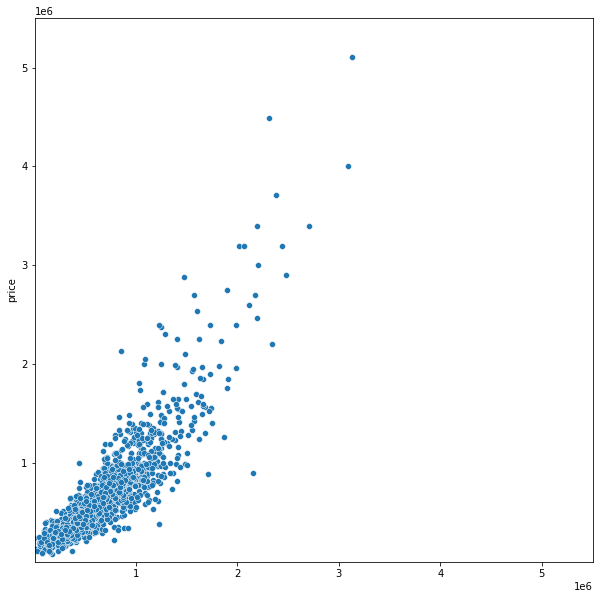

In [83]:
plt.figure(figsize = (10,10))
plt.xlim(1, 5.5e6)
plt.ylim(1,5.5e6)
sns.scatterplot(x = y_pred, y= y_test)
plt.show()

In [84]:
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [88]:
list(df_zip.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'bed/bath', 'avg_fl_space', 'water_bool', 'City', 'Population', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [90]:
df_zip= data_clean('bedrooms', df_zip)

In [93]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model after removing outlier from number of bedrooms
model_6 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     735.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:12:04   Log-Likelihood:            -2.0148e+05
No. Observations:               15025   AIC:                         4.031e+05
Df Residuals:                   14944   BIC:                         4.037e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9754.1153    488.707    -19.959      0.000   -1.07e+04   -8796.189
bedrooms       -8.98e+04   3459.429    -25.959      0.000   -9.66e+04    -8.3e+04
bathrooms      1.274e+05   5778.071     22.049      0.000    1.16e+05    1.39e+05
sqft_living     141.1588      2.708     52.128      0.000     135.851     146.467
sqft_lot          0.2428      0.035      7.014      0.000       0.175       0.311
floors        -6.931e+04   7347.886     -9.433      0.000   -8.37e+04   -5.49e+04
sqft_above      119.0860      3.905     30.499      0.000     111.433     126.739
sqft_basement    22.0728      3.044      7.250      0.000      16.105      28.040
yr_built       -426.7181     70.515     -6.051      0.000    -564.935    -288.501
zipcode           8.8029      1.380      6.380      0.000       6.098      11.508
sqft_living15    53.8797      3.362     16.027      0.000      47.290      60.469
bed/bath       9.856e+04   5284.205     18.651      0.000    8.82e+04    1.09e+05
avg_fl_space    -37.3540      8.875     -4.209      0.000     -54.749     -19.959
water_bool     8.597e+05   1.63e+04     52.850      0.000    8.28e+05    8.92e+05
Population       -9.2290      0.372    -24.828      0.000      -9.958      -8.500
98002           3.07e+04   1.71e+04      1.794      0.073   -2841.683    6.42e+04
98003          1.178e+05   1.82e+04      6.466      0.000    8.21e+04    1.54e+05
98004          7.572e+05   1.43e+04     52.927      0.000    7.29e+05    7.85e+05
98005          2.005e+05   1.55e+04     12.903      0.000     1.7e+05    2.31e+05
98006           3.54e+05   1.49e+04     23.691      0.000    3.25e+05    3.83e+05
98007          2.061e+05   1.85e+04     11.148      0.000     1.7e+05    2.42e+05
98008          2.135e+05   1.38e+04     15.481      0.000    1.86e+05    2.41e+05
98010         -1.896e+05    1.9e+04    -10.002      0.000   -2.27e+05   -1.52e+05
98011          8.837e+04   1.68e+04      5.246      0.000    5.53e+04    1.21e+05
98014         -1.647e+05    1.7e+04     -9.665      0.000   -1.98e+05   -1.31e+05
98019         -1.461e+05   1.49e+04     -9.780      0.000   -1.75e+05   -1.17e+05
98022         -8.432e+04   1.44e+04     -5.847      0.000   -1.13e+05   -5.61e+04
98023          1.257e+05   1.78e+04      7.048      0.000    9.08e+04    1.61e+05
98024         -1.176e+05   2.04e+04     -5.755      0.000   -1.58e+05   -7.75e+04
98027          1.115e+05   1.28e+04      8.694      0.000    8.64e+04    1.37e+05
98028          1.422e+04   1.31e+04      1.088      0.277   -1.14e+04    3.99e+04
98029          1.514e+05   1.32e+04     11.499      0.000    1.26e+05    1.77e+05
98030            1.6e+04   1.63e+04      0.979      0.328    -1.6e+04     4.8e+04
98031          6.472e+04   1.66e+04      3.898      0.000    3.22e+04    9.73e+04
98032          3.682e+04   1.98e+04      1.861   

In [94]:
df_zip_no_out = data_clean('price', df_zip)

In [95]:
X = df_zip_no_out.drop(columns= not_included)
y = df_zip_no_out['price']
#repeating the model after removing outlier from number of bedrooms
model_7 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     702.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:14:14   Log-Likelihood:            -1.7685e+05
No. Observations:               13866   AIC:                         3.539e+05
Df Residuals:                   13785   BIC:                         3.545e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8846.1061    255.411    -34.635      0.000   -9346.747   -8345.465
bedrooms      -1.085e+04   2060.897     -5.264      0.000   -1.49e+04   -6808.973
bathrooms      2.609e+04   3506.355      7.441      0.000    1.92e+04     3.3e+04
sqft_living      75.4829      1.675     45.073      0.000      72.200      78.765
sqft_lot          0.3207      0.020     16.369      0.000       0.282       0.359
floors        -2.654e+04   4222.514     -6.284      0.000   -3.48e+04   -1.83e+04
sqft_above       68.2962      2.426     28.147      0.000      63.540      73.052
sqft_basement     7.1867      1.824      3.941      0.000       3.612      10.761
yr_built       -330.9194     39.445     -8.389      0.000    -408.236    -253.603
zipcode           8.7448      0.771     11.347      0.000       7.234      10.255
sqft_living15    52.9051      2.024     26.135      0.000      48.937      56.873
bed/bath       4713.0718   3059.924      1.540      0.124   -1284.795    1.07e+04
avg_fl_space    -15.0684      5.195     -2.901      0.004     -25.251      -4.886
water_bool     2.286e+05   1.56e+04     14.687      0.000    1.98e+05    2.59e+05
Population       -7.7353      0.246    -31.384      0.000      -8.218      -7.252
98002          1.147e+04   8890.341      1.290      0.197   -5957.156    2.89e+04
98003          1.056e+05   9649.053     10.939      0.000    8.66e+04    1.24e+05
98004            4.6e+05   1.05e+04     43.961      0.000    4.39e+05    4.81e+05
98005          2.465e+05   8978.991     27.454      0.000    2.29e+05    2.64e+05
98006          3.226e+05   8199.487     39.345      0.000    3.07e+05    3.39e+05
98007          2.234e+05   9876.526     22.623      0.000    2.04e+05    2.43e+05
98008          2.049e+05   7469.799     27.425      0.000     1.9e+05    2.19e+05
98010         -1.196e+05   1.07e+04    -11.198      0.000   -1.41e+05   -9.87e+04
98011           1.21e+05   8787.776     13.772      0.000    1.04e+05    1.38e+05
98014         -9.412e+04   9786.180     -9.617      0.000   -1.13e+05   -7.49e+04
98019          -8.43e+04   8449.600     -9.977      0.000   -1.01e+05   -6.77e+04
98022         -6.506e+04   7688.014     -8.462      0.000   -8.01e+04      -5e+04
98023          1.139e+05   9570.453     11.900      0.000    9.51e+04    1.33e+05
98024         -5.471e+04   1.19e+04     -4.603      0.000    -7.8e+04   -3.14e+04
98027          1.544e+05   6851.229     22.542      0.000    1.41e+05    1.68e+05
98028          5.133e+04   7046.156      7.285      0.000    3.75e+04    6.51e+04
98029          1.881e+05   7019.369     26.792      0.000    1.74e+05    2.02e+05
98030          2.005e+04   8491.284      2.362      0.018    3410.552    3.67e+04
98031          5.474e+04   8652.914      6.326      0.000    3.78e+04    7.17e+04
98032          2.694e+04   1.03e+04      2.621   